# Multi-class Classification


## Tasks

### Task 1

Import data you need to solve tasks for this lesson. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sigma_cabs.csv')

In [3]:
df.head() 

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
df.shape

(131662, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

#### Data description:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)

In [6]:
df = df.set_index('Trip_ID')

In [7]:
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


### Task 2

Check target class balance.

In [8]:
df.Surge_Pricing_Type.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [9]:
df.Surge_Pricing_Type.value_counts(normalize=True)

2    0.430861
3    0.362443
1    0.206696
Name: Surge_Pricing_Type, dtype: float64

### Task 3. 

Check data for missing values.

In [10]:
df.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

### Task 4. 

Fill in missing values:
- with median value for numerical features
- with the most common value for categorical features

In [11]:
numeric_cols = df.loc[:, df.dtypes != np.object].columns

In [12]:
numeric_cols

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

In [13]:
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [14]:
categorical_cols = df.loc[:, df.dtypes == np.object].columns

In [15]:
categorical_cols

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

In [16]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].value_counts().index[0])

In [17]:
df.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

### Task 5. 

Build a correlation matrix.

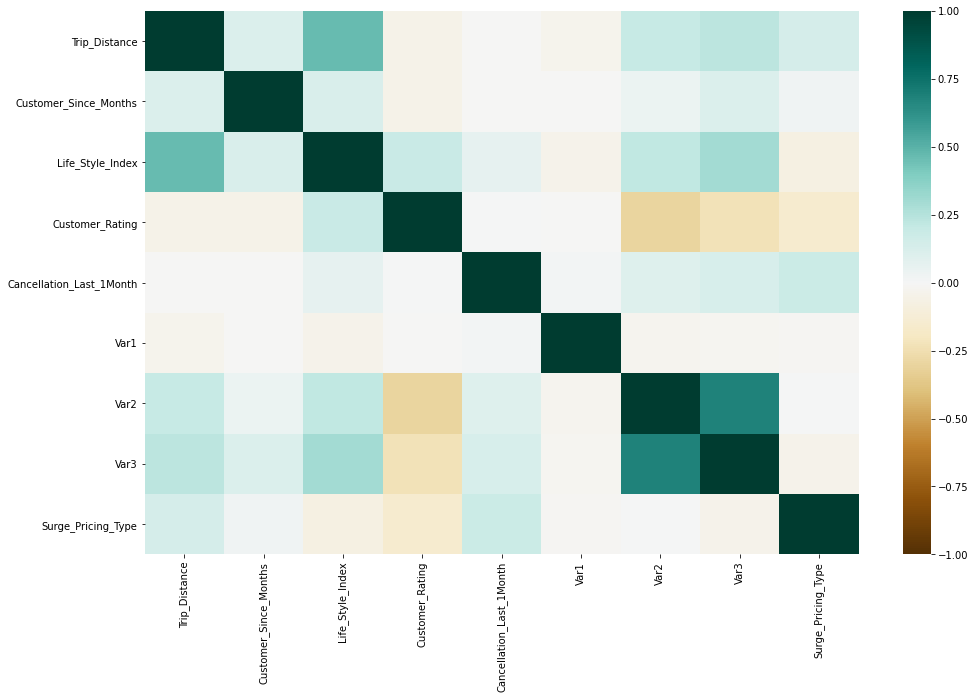

In [18]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.heatmap(df[numeric_cols].corr(), 
            xticklabels=numeric_cols,
            yticklabels=numeric_cols,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

### Task 6. 

Show top-5 the most correlated features. 

In [19]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_cols], 5))

Top Absolute Correlations
Var2              Var3                0.683437
Trip_Distance     Life_Style_Index    0.468332
Life_Style_Index  Var3                0.303324
Customer_Rating   Var2                0.302968
Trip_Distance     Var3                0.231706
dtype: float64


### Task 7. 

Apply One-Hot Encoding for categorical features. 

In [20]:
for col in categorical_cols:
    ohe = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df.drop(col, axis=1), ohe], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131662 entries, T0005689460 to T0005908514
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Trip_Distance                  131662 non-null  float64
 1   Customer_Since_Months          131662 non-null  float64
 2   Life_Style_Index               131662 non-null  float64
 3   Customer_Rating                131662 non-null  float64
 4   Cancellation_Last_1Month       131662 non-null  int64  
 5   Var1                           131662 non-null  float64
 6   Var2                           131662 non-null  int64  
 7   Var3                           131662 non-null  int64  
 8   Surge_Pricing_Type             131662 non-null  int64  
 9   Type_of_Cab_B                  131662 non-null  uint8  
 10  Type_of_Cab_C                  131662 non-null  uint8  
 11  Type_of_Cab_D                  131662 non-null  uint8  
 12  Type_of_Cab_E       

### Task 8. 

Split data on train and test samples.

In [22]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
y = df['Surge_Pricing_Type']
X = df.drop('Surge_Pricing_Type', axis=1)

In [24]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

### Task 9.

Fit a One-vs-Rest Logreg classification model and check metrics using in-built `classification_report`.

In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


pipe_one_rest = Pipeline([
    ('scaler', StandardScaler()),
    ('one_vs_rest_logreg', OneVsRestClassifier(LogisticRegression()))
])

pipe_one_rest.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_rest_logreg',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

In [26]:
from sklearn.metrics import classification_report


print(classification_report(y_test, pipe_one_rest.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.723     0.542     0.619      5372
           2      0.636     0.834     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



### Task 10. 

Build calibration curves for all three models (class_1-vs-rest, class_2-vs-rest, class_3-vs-rest).

In [27]:
# predic_proba returns probabilities for all three classes
pipe_one_rest.predict_proba(X_test)[:1]

array([[0.30013462, 0.29224922, 0.40761616]])

In [28]:
# a helper function to modify predict_proba so it returns probabilities for a given class and the rest classes
def multi_proba_to_binary(probas, class_position):
    binary_probas = []
    for i in probas:
        proba_one = i[class_position]
        proba_rest = sum(i) - proba_one
        binary_probas.append([proba_rest, proba_one])
    return np.array(binary_probas)

In [29]:
# checking that the helper function works as expected
multi_proba_to_binary(probas=pipe_one_rest.predict_proba(X_test)[:1], class_position=0)

array([[0.69986538, 0.30013462]])

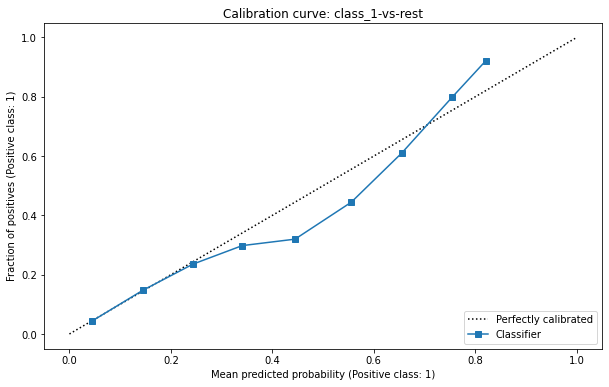

In [30]:
from sklearn.calibration import CalibrationDisplay


disp = CalibrationDisplay.from_predictions(y_test==1, 
                                           multi_proba_to_binary(probas=pipe_one_rest.predict_proba(X_test), class_position=0)[:, 1],
                                           n_bins=10)
ax = disp.ax_

fig = ax.figure
fig.set_size_inches(10, 6)
ax.set_title('Calibration curve: class_1-vs-rest');

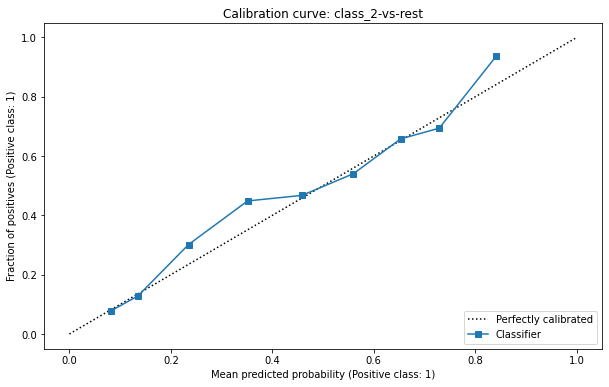

In [31]:
disp = CalibrationDisplay.from_predictions(y_test==2, 
                                           multi_proba_to_binary(probas=pipe_one_rest.predict_proba(X_test), class_position=1)[:, 1],
                                           n_bins=10);

ax = disp.ax_

fig = ax.figure
fig.set_size_inches(10, 6)
ax.set_title('Calibration curve: class_2-vs-rest');

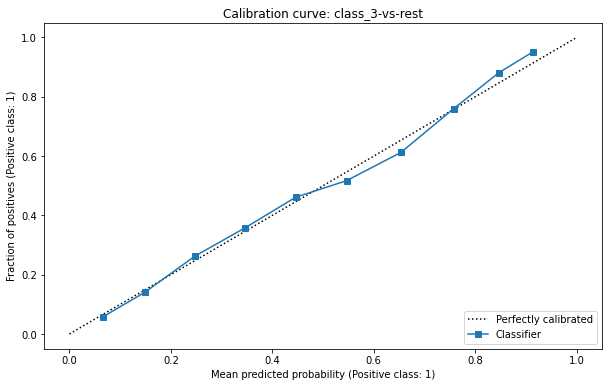

In [32]:
disp = CalibrationDisplay.from_predictions(y_test==3, 
                                           multi_proba_to_binary(probas=pipe_one_rest.predict_proba(X_test), class_position=2)[:, 1],
                                           n_bins=10);

ax = disp.ax_

fig = ax.figure
fig.set_size_inches(10, 6)
ax.set_title('Calibration curve: class_3-vs-rest');

### Task 11. 

tbc..